In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
from PIL import Image
import os
from tqdm import tqdm

In [23]:
def load_paired_images(raw_dir, ref_dir):
    raw_files = sorted([f for f in os.listdir(raw_dir) if f.lower().endswith(".png")])
    ref_files = sorted([f for f in os.listdir(ref_dir) if f.lower().endswith(".png")])
    
    raw_images = []
    ref_images = []
    missing_pairs = []

    for file_name in tqdm(raw_files, desc="Loading paired images"):
        ref_path = os.path.join(ref_dir, file_name)
        raw_path = os.path.join(raw_dir, file_name)

        if not os.path.exists(ref_path):
            missing_pairs.append(file_name)
            continue
        
        raw_img = cv2.imread(raw_path)
        ref_img = cv2.imread(ref_path)

        if raw_img is None or ref_img is None:
            print(f"⚠️ Could not read pair: {file_name}")
            continue
        
        raw_images.append(raw_img)
        ref_images.append(ref_img)

    print(f"\n✅ Loaded {len(raw_images)} paired images.")
    if missing_pairs:
        print(f"⚠️ Missing {len(missing_pairs)} reference images for files: {missing_pairs[:5]}{'...' if len(missing_pairs) > 5 else ''}")

    return raw_images, ref_images


In [24]:
raw_dir = "/Users/pritam/Desktop/DIP/Project/DeepSea-Image-Enhancement/raw-890/raw-890"
ref_dir = "/Users/pritam/Desktop/DIP/Project/DeepSea-Image-Enhancement/reference-890/reference-890"

raw_images, ref_images = load_paired_images(raw_dir, ref_dir)
print(f"✅ Final count: {len(raw_images)} pairs ready for training.")


Loading paired images: 100%|██████████| 890/890 [00:16<00:00, 53.32it/s] 



✅ Loaded 890 paired images.
✅ Final count: 890 pairs ready for training.


In [25]:
challenge_dir = "/Users/pritam/Desktop/DIP/Project/DeepSea-Image-Enhancement/challenging-60/challenging-60"
challenging_images = []
for file_name in os.listdir(challenge_dir):
    if file_name.lower().endswith(".png"):
        path = os.path.join(challenge_dir, file_name)
        img = cv2.imread(path)
        if img is not None:
            challenging_images.append(img)
        else:
            print(f"⚠️ Could not read image: {file_name}")

print(f"✅ Loaded {len(challenging_images)} images")

✅ Loaded 60 images


In [ ]:
def apply_clahe(image, alpha, tile):
    if image is None:
        print("Error: Could not load image.")
    else:
        # 1. Convert BGR to LAB color space
        img_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

        # 2. Split the LAB image into L, A, and B channels
        l, a, b = cv2.split(img_lab)
        histL = cv2.calcHist([l], [0], None, [256], [0, 256])
        # 3. Apply CLAHE to the L channel
        clahe = cv2.createCLAHE(clipLimit=alpha, tileGridSize=tile)
        cl = clahe.apply(l)
        histCL = cv2.calcHist([cl], [0], None, [256], [0, 256])
        # 4. Merge the channels and convert back to BGR
        merged_lab = cv2.merge((cl, a, b))
        enhanced_img = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2BGR)

    return enhanced_img, histL, histCL

In [54]:
seed = np.random.seed(21)
idx = np.random.randint(0,len(raw_images))
enhanced_img, histL, histCL = apply_clahe(raw_images[idx], 5, (10,10))

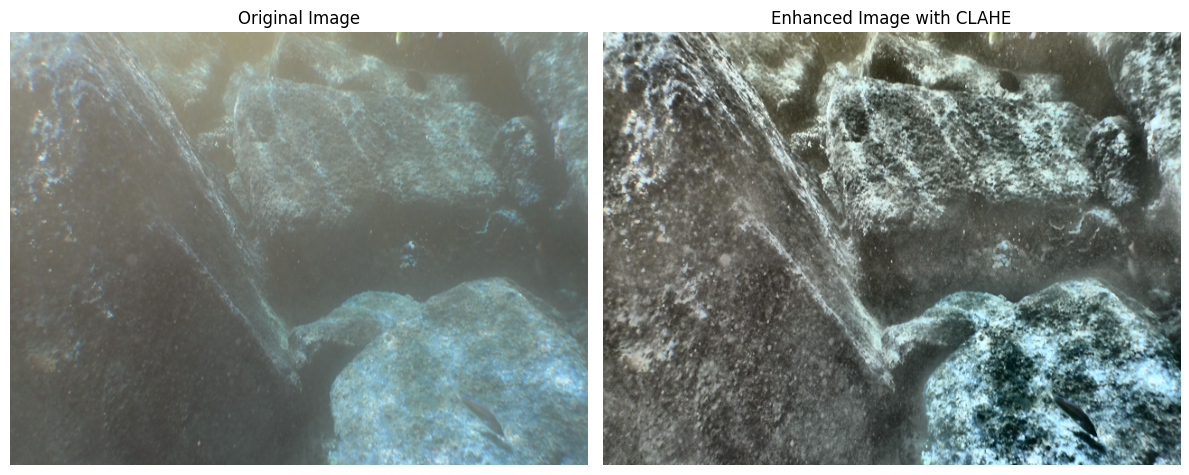

In [55]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Display the original image in the first subplot
ax[0].imshow(raw_images[idx])
ax[0].set_title('Original Image')
ax[0].axis('off') # Hide the axes

# Display the enhanced image in the second subplot
ax[1].imshow(enhanced_img)
ax[1].set_title('Enhanced Image with CLAHE')
ax[1].axis('off') # Hide the axes

plt.tight_layout()
plt.show()

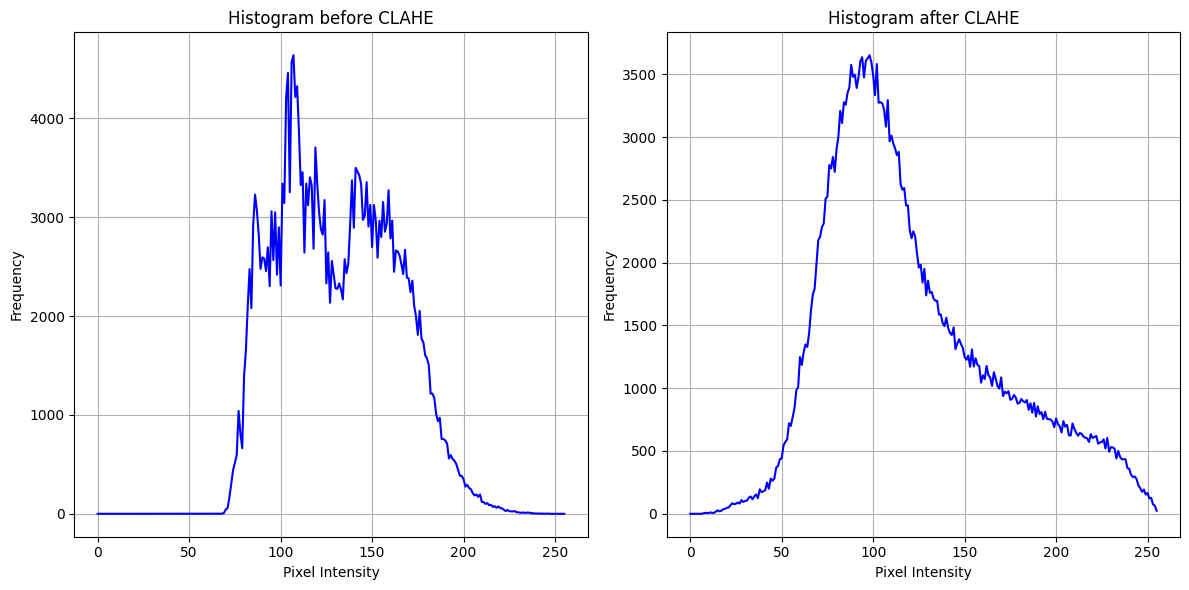

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original histogram on the first subplot
ax[0].plot(histL, color='b')
ax[0].grid(True)
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram before CLAHE")
ax[0].set_xlabel("Pixel Intensity")

# Plot the enhanced histogram on the second subplot
ax[1].plot(histCL, color='b')
ax[1].grid(True)
ax[1].set_title("Histogram after CLAHE")
ax[1].set_xlabel("Pixel Intensity")
ax[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()